# **SPAM EMAIL CLASSIFIER**

### **Load the dataset**

In [21]:
import pandas as pd

dataset_path = '../data/spam.csv'
df = pd.read_csv(dataset_path, encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- Since the dataset has unnecessary columns, we drop it and rename the main columns.

In [22]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **Exploratory Data Analysis**

In [32]:
print(f'The dataset contains {df.shape} rows and columns')

The dataset contains (5572, 2) rows and columns


- Check for the Spam-Ham distribution

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

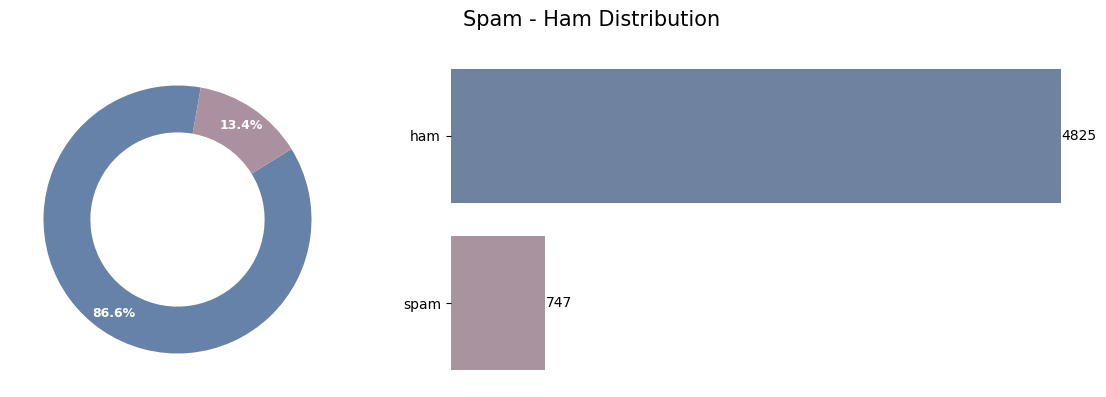

In [45]:
def plot_distribution(df):
    plt.rcParams.update({'figure.facecolor': 'white', 'axes.facecolor': 'white'})
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    value_counts = df['label'].value_counts()
    labels, colors = value_counts.index.tolist(), ["#6782a8", "#ab90a0"]

    ax[0].pie(value_counts, labels=labels, autopct='%1.1f%%', colors=colors,
              textprops={'size': 9, 'color': 'white', 'fontweight': 'bold'}, 
              wedgeprops={'width': 0.35}, startangle=80, pctdistance=0.85)
    ax[0].add_artist(plt.Circle((0, 0), 0.6, fc='white'))

    sns.countplot(data=df, y='label', ax=ax[1], hue='label', palette=colors, order=labels, legend=False)
    for i, v in enumerate(value_counts):  
        ax[1].text(v + 1, i, str(v), color='black', fontsize=10, va='center')

    sns.despine(left=True, bottom=True)
    ax[1].set(ylabel=None, xlabel="", xticks=[])

    fig.suptitle('Spam - Ham Distribution', fontsize=15)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

plot_distribution(df)


In [28]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


- Check for missing values.

In [30]:
df.isnull().sum()

label    0
text     0
dtype: int64